첫 번째 시간
- 실습

ㄴ### 목표
- 폐암 환자의 생존을 예측하는 분류 모델을 만들어보자!
- 신경망을 활용하여 2진분류 문제를 해결해보자!

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# print working directory ; linux
%pwd

'/content'

In [ ]:
# change directory : 작업 경로 변경
%cd /content/drive/MyDrive/Colab Notebooks/17.SW 캠프 데이터 비즈니스 과정

/content/drive/MyDrive/Colab Notebooks/17.SW 캠프 데이터 비즈니스 과정


In [ ]:
%pwd

'/content/drive/MyDrive/Colab Notebooks/17.SW 캠프 데이터 비즈니스 과정'

In [ ]:
# header : 데이터프레임에서 특정행을 컬럼명으로 설정해주는 인자값(None: 인덱스 번호로 출력)
data = pd.read_csv("data/ThoraricSurgery.csv", header=None)

In [ ]:
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,293,1,3.80,2.80,0,0,0,0,0,0,12,0,0,0,1,0,62,0
1,1,2,2.88,2.16,1,0,0,0,1,1,14,0,0,0,1,0,60,0
2,8,2,3.19,2.50,1,0,0,0,1,0,11,0,0,1,1,0,66,1
3,14,2,3.98,3.06,2,0,0,0,1,1,14,0,0,0,1,0,80,1
4,17,2,2.21,1.88,0,0,1,0,0,0,12,0,0,0,1,0,56,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,98,6,3.04,2.40,2,0,0,0,1,0,11,0,0,0,1,0,76,0
466,369,6,3.88,2.72,1,0,0,0,1,0,12,0,0,0,1,0,77,0
467,406,6,5.36,3.96,1,0,0,0,1,0,12,0,0,0,0,0,62,0
468,25,8,4.32,3.20,0,0,0,0,0,0,11,0,0,0,0,0,58,1


In [ ]:
X = data.iloc[:, :-1]   # 행의범위, 열의범위
y = data.iloc[:, -1]

In [ ]:
X.shape, y.shape

((470, 17), (470,))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=999)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(352, 17)
(118, 17)
(352,)
(118,)


### 딥러닝 신경망 구성
- 1. 신경망 구조 설계
- 2. 학습 및 평가방법 설정
- 3. 학습 + 시각화
- 4. 모델 평가

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
# 1. 신경망 구조 설계
model = Sequential()

# 입력층(input_dim) + 중간층 1개(Dense)
# activation : 활성화함수(들어온 자극(데이터)에 대한 응답 여부를 결정하는 함수)
model.add(Dense(16, input_dim=17, activation = 'sigmoid'))

# 중간층
model.add(Dense(8, activation='sigmoid'))    #하나의 층
model.add(Dense(4, activation='sigmoid'))   #하나의 층

# 출력층
# 출력층은 문제의 종류에 따라 고정됨 (2진분류 문제는 출력층 뉴런개수 1개, 활성화함수는 sigmoid로 고정)
model.add(Dense(1,activation='sigmoid'))   # 세개이상일 땐 다중분류 해야함

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                288       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 4)                 36        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 465
Trainable params: 465
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 2. 학습 및 평가방법 설정
# binary_crossentropy : 2진분류에 사용하는 손실함수
model.compile(loss='binary_crossentropy',
              optimizer = 'SGD', # 최적화함수: 확률적경사하강법(SGD) 활용
              metrics = ['acc']   #metrics: 평가 방법을 설정(분류 믄제이므로 정확도 출력 필요)
              )

In [16]:
h = model.fit(X_train, y_train,
              epochs = 100
              )

### activation(활성화함수) -> 자극에 대한 반응여부와 그 정도를 결정하는 함수
- 1. 회귀: linear(선형함수) -> 신경망에서 도출된 수치값을 그대로 예측에 사용
(신경망은 회귀모델을 기반으로 동작하기 때문)
- 2. 분류: 인공신경망은 선형회귀 모델을 기반으로 하고 있기 때문에 여기서 도출된 수치값으로는 분류 문제를 풀기 힘듦
- 이진 분류 : sigmoid 함수를 통해서 최종적으로 0 or 1로 분류해낼 수 있음.

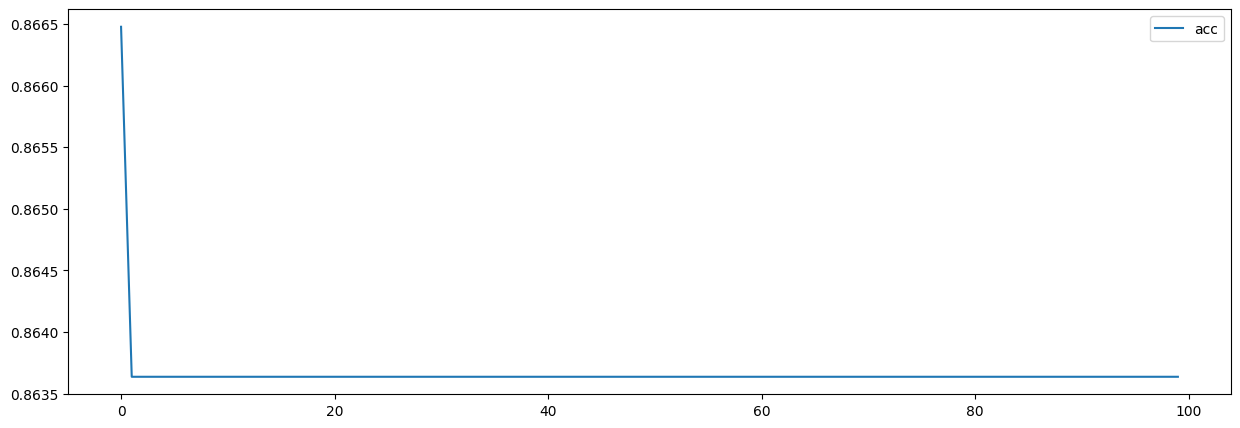

In [ ]:
# 3. 시각화
plt.figure(figsize=(15, 5))

plt.plot(h.history['acc'], label = 'acc')

plt.legend()
plt.show()

In [ ]:
# 4. 모델 평가
model.evaluate(X_test, y_test)

4/4 [==============================] - 1s 5ms/step - loss: 0.4888 - acc: 0.8136


[0.4888434112071991, 0.8135592937469482]